<a href="https://colab.research.google.com/github/Praveenyeduresi/CE880_CaseStudy/blob/main/MA336_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introduction

This project aims to predict customer churn in the banking industry using machine learning. Customer churn refers to the phenomenon where a customer leaves a bank. Churning is one of the significant issues to consider in banking industries as it creates a major impact on a bank's revenue. Retaining a customer is more important than obtaining a new customer for the bank. According to (Nie et al., 2011) [1] , an improvement of a 5% retention rate can increase 85% of a bank’s profit.Henceforth, banks are in essential need to identify the at-risk customers and stop churning.

There is a wide range of research happening in the banking field to predict the likelihood of customer churn. Several studies have proven that by utilizing the capabilities of machine learning, banks can identify at-risk bank customers who are likely to leave bank services to another bank. By knowing the at-risk customers, the bank can implement successful retention strategies to prevent churning.

This project uses the data from a Kaggle competition named 'Bank Customer Churn Prediction' and it uses a wide range of datascience techniques to achieve the objective. It employed Five stage approach. In the first stage, data has been collected from Kaggle. In the second stage, data has been explored to check initial challenges and in the third stage, all those challenges have been treated using respective data preprocessing techniques. The fourth stage is Exploratory Data Analysis(EDA), in this stage using different visualization techniques, this project aims to understand the data patterns and unearth the reasons behind churning finally at the fifth stage, a wide range of machine learning models has been trained, and evaluated using train and test datasets. A full comparative study has been performed to select the best performing model. This prediction model will identify at-risk bank customers who are likely to exit the bank.

In [2]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
!pip install category_encoders
import category_encoders as ce
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#!pip install xgboost
import xgboost as xgb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.1 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/My Drive')

##### 1.1 Data Loading

In [6]:
#Data Loading
df=pd.read_csv("Churn_Modelling.csv")
print("Data shape is :",df.shape)
print("Data Features are: ",df.columns)
df.head()

Data shape is : (10002, 14)
Data Features are:  Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


Data contains 10002 customer records and 14 variables. These variables contain unique identifiers, age, gender, geography, and other financial information about each bank customer. 13 of these variables act as predictors, and one variable 'Exicted' is the response (or) target variable. This is the variable which determines whether a bank customer has been exited or not exited from the bank.

##### 1.2 Data Exploration

In this stage, data has been explored to gain initial insights and investigate challenges.

In [ ]:
#Dropping Rownumber
df.drop(columns=['RowNumber'], inplace=True)
df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [ ]:
#checking duplicates
df[df.duplicated('CustomerId')]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10001,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [ ]:
df[(df['CustomerId']==15682355) | (df['CustomerId']== 15628319)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [ ]:
#checking data types
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# exploring Age column
df['Age'].unique()

array([42.  , 41.  , 39.  , 43.  , 44.  , 50.  , 29.  ,   nan, 31.  ,
       24.  , 34.  , 25.  , 35.  , 45.  , 58.  , 45.25, 32.34, 38.  ,
       46.  , 36.44, 36.  , 33.  , 40.  , 51.  , 61.  , 49.  , 32.  ,
       27.  , 37.  , 19.  , 66.  , 56.  , 26.  , 21.  , 55.  , 75.  ,
       22.  , 30.  , 28.  , 65.  , 48.  , 52.  , 57.  , 73.  , 47.  ,
       54.  , 72.  , 20.  , 67.  , 79.  , 62.  , 53.  , 80.  , 59.  ,
       68.  , 23.  , 60.  , 70.  , 63.  , 64.  , 18.  , 82.  , 69.  ,
       74.  , 71.  , 76.  , 77.  , 88.  , 85.  , 84.  , 78.  , 81.  ,
       92.  , 83.  ])

In [ ]:
#Data description
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
#checking missing values
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

Upon exploring the data, this project found four challenges. Firstly, the dataset has the challenge of Duplicate rows. Customer IDs 15682355 and 15628319 are duplicated. Next, the Age variable contains float values. Third, the dataset has a few challenges of Missing values, the variables 'Geography', 'Age', 'Has credit card', and 'Is active member' features has a record missing from each of them. and finally, data has Categorical features. As not all machine learning algorithms work on categorical values, there is a necessity of converting them to numerical.

##### 1.3 Data Cleansing

This section of data preprocessing (or) cleansing aimed to resolve the challenges in the data identified at data exploration stage.

In [ ]:
# delete duplicates rows
print(df.shape)
df = df.drop_duplicates(subset='CustomerId', keep='first')

print(df[df.duplicated('CustomerId')])
print(df.shape)

(10002, 13)
Empty DataFrame
Columns: [CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []
(10000, 13)


In [ ]:
# Replace missing values with mode and mean imputation
mode=df['Geography'].mode()[0]
df['Geography'].fillna(mode, inplace=True)

mode=df['HasCrCard'].mode()[0]
df['HasCrCard'].fillna(mode, inplace=True)

mode=df['IsActiveMember'].mode()[0]
df['IsActiveMember'].fillna(mode, inplace=True)

mean=round(df['Age'].mean())
df['Age'].fillna(mean, inplace=True)

In [ ]:
#checking missing values after data cleansing
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# rounding age to nearest integers
df['Age'] = df['Age'].round().astype(int)
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 31, 24, 34, 25, 35, 45, 58, 32, 38, 46,
       36, 33, 40, 51, 61, 49, 27, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

For the first challenge, Duplicate records has been removed from the data. Second, the missing values have been treated using mean and mode imputation techniques. Given the categorical and numerical data, using the simple methods of Mode imputation and Mean imputation missing values has been replaced. Finally, all the float age values are rounded to the nearest integers.

##### 1.4 Exploratory Data Analysis (EDA)

The main aim of this stage is to understand the data patterns and unearth the reasons behind customers churning from the bank. It uses univariant and bivariant analytical techniques. It is important to note that all these deriven insights are for given bank churning data and the insights may vary for another set of different data.

###### 1.4.1 Univariant Analysis

During univariant analysis, each variable in the dataset has been analysed individually to understand its properties.

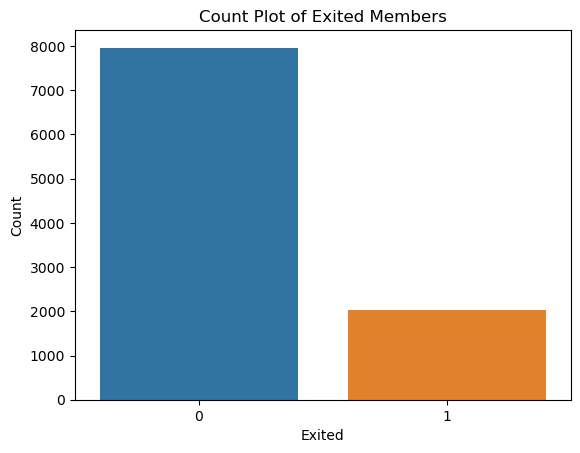

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
# Data distributions
#exploring target variable
sns.countplot(x='Exited', data=df)
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Count Plot of Exited Members')
plt.show()

df['Exited'].value_counts()

In [ ]:
# filtering categorical data
df_categorical=df[['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Exited']]
print(df_categorical.shape)
df_categorical.head()

(10000, 6)


,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1.0,1.0,1
1,Spain,Female,1,0.0,1.0,0
2,France,Female,3,1.0,0.0,1
3,France,Female,2,0.0,0.0,0
4,Spain,Female,1,1.0,1.0,0


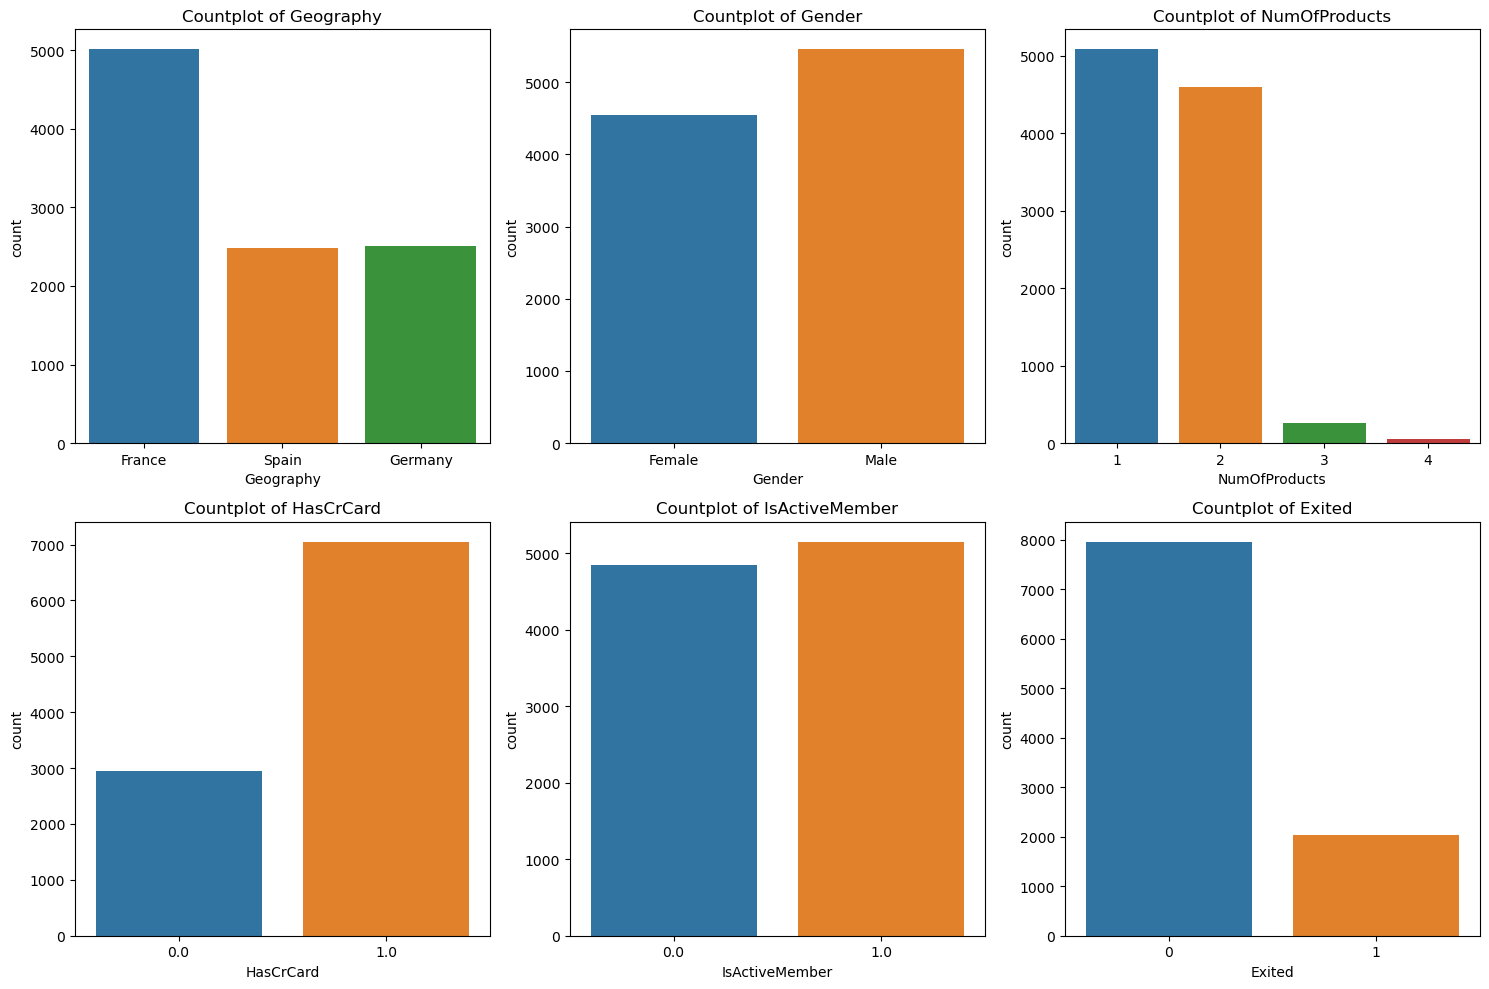

In [ ]:
# Distributions of categorical features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(df_categorical.columns):
    sns.countplot(x=col, data=df_categorical, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# filtering numerical features
df_numerical=df[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]
print(df_numerical.shape)
df_numerical.head()

(10000, 5)


,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,619,42,2,0.00,101348.88
1,608,41,1,83807.86,112542.58
2,502,42,8,159660.80,113931.57
3,699,39,1,0.00,93826.63
4,850,43,2,125510.82,79084.10


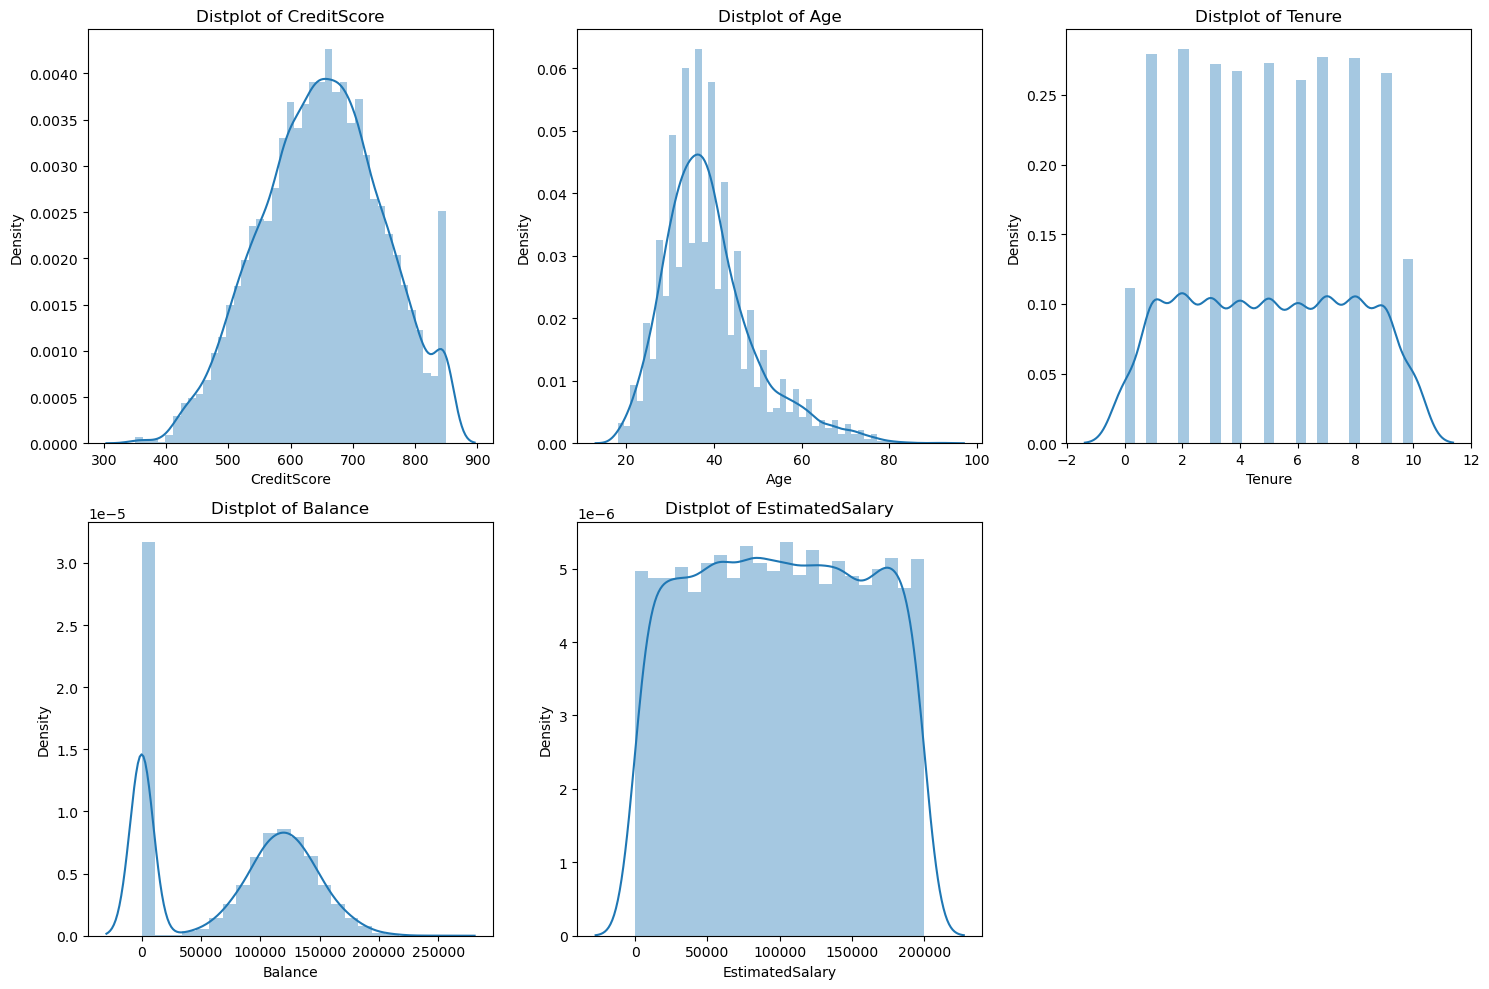

In [ ]:
# Distributions of numerical features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(df_numerical.columns):
    sns.distplot(df_numerical[col], ax=axes[i])
    axes[i].set_title(f'Distplot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
#Balance variable distribution
df['Balance'].value_counts()

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

#### Observations in univariant analysis
1. On observation of the Geography feature, the bank has the majority of customers from France and fewer from Spain
2. Based on Gender feature distribution, it is evident that most of the bank customers are Male
3. The number of products analysis plot states that most customers use 1 or 2 products
4. Credit card usage among customers is high
5. Observing the active member plot, it says that distribution between active states and non-active states are almost equal
6. The credit score variable seems normally distributed and Age of the customers are skewed to the right
7. Tenure and salary distribution are fairly evenly distributed,
8. finally balance variable seems bimodal distribution, significant number of the customers having a zero balance. Among non-zero balance customers, the distribution appears to be normal

###### 1.4.2 Bivariant Analysis

During Bivariant analysis, two variables in the dataset have been analyzed at a time to understand potential associations.

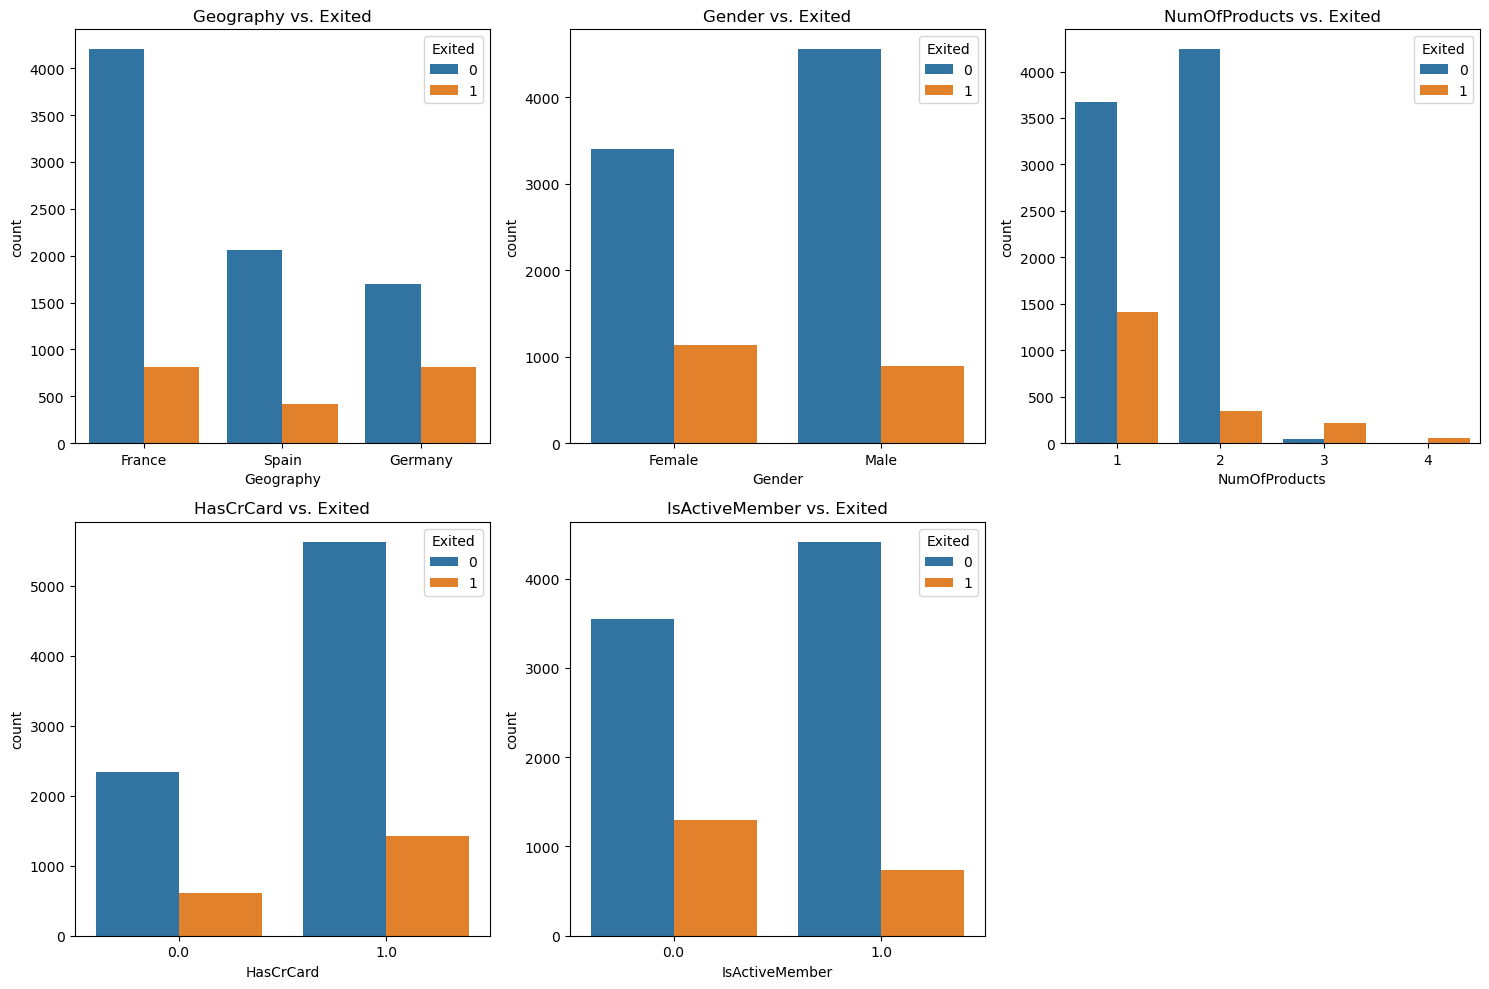

In [ ]:
# Bivariant analysis- each categorical feature with target variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(df_categorical.columns[:-1]):
    sns.countplot(x=col, hue='Exited', data=df_categorical, ax=axes[i])
    axes[i].set_title(f'{col} vs. Exited')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
#Correlation matrix on numerical feartures
correlation_matrix = df_numerical.corr()
correlation_matrix

,CreditScore,Age,Tenure,Balance,EstimatedSalary
CreditScore,1.000000,-0.003926,0.000842,0.006268,-0.001384
Age,-0.003926,1.000000,-0.010117,0.028417,-0.007258
Tenure,0.000842,-0.010117,1.000000,-0.012254,0.007784
Balance,0.006268,0.028417,-0.012254,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007258,0.007784,0.012797,1.000000


#### Observations in Bivariant Analysis
1. Although the bank has the majority of customers from France, the churn rate from France is low. According to bivariant geography and exited variant analysis, German customers are exited in higher proportion compared to Spain and france customers
2. Analysis of gender and exited variables infers that female customers are exited more than male customers
3. According to the data, the customers who are using one product are exiting more from the bank. Customers with 2 products almost stayed
4. A large number of customers who are holding credit has exited the bank
5. Finally, more number of customers who are not active members are exited

## 2. Methods

The main aim of the methods section is to describe the problem, describe the type and choice of machine learning algorithms, and finally evaluation metrics that are going to be used for developing the prediction model that identifies at-risk bank customers who are likely to exit the bank. This section also explains the modeling stage of the project.

From the data exploration stage, it is evident that the target variable contains binary values and the objective is to predict customer churn.Bbased on these factors, the project classified the objective as an supervised binary classification problem and a wide range of supervised machine learning models such as Logistic Regression, Decision Tree, Random Forest, Support Vector Classifier, KNN Classifier, and XGBoost Classifier has been choosen. The project aimed to train the churn data on this wide range of techniques, then perform a comparative study, and finally select the best-performing model based on the evaluation metrics. Given it is a binary classifier and with intention to balance the target values, this project chose classification report metrics such as Accuracy, precision, recall, and F-score as evaluation metrics.

The modeling stage is the crucial stage in the entire project as it comprises training and evaluation of the chosen machine learning models. Before proceeding to model training, the project performed three tasks. First, as the target variable 'exited' is highly unbalanced, this project upsampled the minority classes to balance the class distribution. Second, the entire data has been split into train and test datasets and finally, each category feature in the both train and test datasets has been converted to numerical value using ordinal encoding techniques.

##### 2.1 Upsampling

In [ ]:
# performing upsampling to balance minority classes
churned = df[df['Exited']==1]
not_churned = df[df['Exited'] == 0]
upsampled_churned = resample(churned, replace=True, n_samples=len(not_churned),random_state=42)
df_upsampled = pd.concat([upsampled_churned,not_churned])

print(df_upsampled.shape)
df_upsampled['Exited'].value_counts()

(15926, 13)


Exited
1    7963
0    7963
Name: count, dtype: int64

##### 2.2 Training and Testing Datasets

In [ ]:
# Dropping CustomerId and Surname as they dont contribute to prediction
df_upsampled.drop(columns=['CustomerId','Surname'], inplace=True)

#seperating dependent and independent features
X = df_upsampled.drop(columns=['Exited'])
y = df_upsampled['Exited']

#Splitting train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(df_upsampled.shape)
print(X_train.shape)
print(X_test.shape)

(15926, 11)
(12740, 10)
(3186, 10)


##### 2.3  Encoding

In [ ]:
# converting each categorical value to an integers using ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# data after encoding
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7045,850,1,1,36,6,0.00,1,1,1,190194.95
7397,572,2,2,47,4,99353.42,2,1,2,196549.85
8719,691,1,1,44,6,134066.10,1,1,1,197572.41
2973,591,1,1,56,9,128882.49,2,1,1,196241.94
9750,708,1,1,51,8,70754.18,2,1,1,92920.04


##### 2.4 Model training using Logistic Regression

In [ ]:
#Logistic Regression training and evaluation
logistic_regression_classifier = LogisticRegression(max_iter = 1000, random_state=0)
logistic_regression_classifier.fit(X_train, y_train)
y_pred = logistic_regression_classifier.predict(X_test)

print("Classification report of Logistic Regression:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classification report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.67      0.66      0.66      1581
           1       0.67      0.68      0.67      1605

    accuracy                           0.67      3186
   macro avg       0.67      0.67      0.67      3186
weighted avg       0.67      0.67      0.67      3186

[[1044  537]
 [ 520 1085]]


##### 2.5 Model training using Decision Tree

In [ ]:
#Decision Tree training and evaluation
Decision_Tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

Decision_Tree_classifier.fit(X_train, y_train)
y_pred = Decision_Tree_classifier.predict(X_test)


print("Classification report of Decision Tree:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classification report of Decision Tree:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77      1581
           1       0.80      0.67      0.73      1605

    accuracy                           0.75      3186
   macro avg       0.75      0.75      0.75      3186
weighted avg       0.76      0.75      0.75      3186

[[1307  274]
 [ 528 1077]]


In [ ]:
# Feature importances
feature_importances_dict = {}
for i, name in enumerate(X_train): feature_importances_dict.update({name : Decision_Tree_classifier.feature_importances_[i]})

feature_importances_sorted = dict(sorted(feature_importances_dict.items(), key=lambda x:x[1], reverse=True))

print('important Features inorder importance order:')
for key in feature_importances_sorted:
    print(key)

important Features inorder importance order:
Age
NumOfProducts
Balance
IsActiveMember
CreditScore
Geography
Gender
Tenure
HasCrCard
EstimatedSalary


##### 2.6 Model training using Random Forest

In [ ]:
# Random Forest training and evaluation
RandomForest_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
RandomForest_classifier.fit(X_train, y_train)
y_pred = RandomForest_classifier.predict(X_test)

print("Classification report of Random Forest model:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classification report of Random Forest model:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1581
           1       0.93      0.98      0.96      1605

    accuracy                           0.95      3186
   macro avg       0.96      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186

[[1468  113]
 [  34 1571]]


##### 2.7 Model training using Support Vector Classifier

In [ ]:
SV_classifier = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
SV_classifier.fit(X_train, y_train)
y_pred = SV_classifier.predict(X_test)

print("Classification report of Support Vector Classifier:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classification report of Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1581
           1       1.00      0.95      0.97      1605

    accuracy                           0.97      3186
   macro avg       0.98      0.98      0.97      3186
weighted avg       0.98      0.97      0.97      3186

[[1581    0]
 [  80 1525]]


##### 2.8 Model training using KNN

In [ ]:
#KNN training and evaluation
KNN_Classifier = KNeighborsClassifier(n_neighbors=5)
KNN_Classifier.fit(X_train, y_train)
y_pred = KNN_Classifier.predict(X_test)

print("Classification report of KNN Classifier:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classification report of KNN Classifier:
              precision    recall  f1-score   support

           0       0.75      0.58      0.66      1581
           1       0.66      0.81      0.73      1605

    accuracy                           0.70      3186
   macro avg       0.71      0.70      0.69      3186
weighted avg       0.71      0.70      0.70      3186

[[ 924  657]
 [ 301 1304]]


##### 2.9 Model training using XGB

In [ ]:
# XGB training and evaluation
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_Classifier = xgb.XGBClassifier()
xgb_Classifier = xgb_Classifier.fit(X_train, y_train_encoded)

y_pred = xgb_Classifier.predict(X_test)

print("Classification report of XGBoost Classifier:")
print(classification_report(y_test_encoded, y_pred))
print(confusion_matrix(y_test_encoded, y_pred))

Classification report of XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1581
           1       0.89      0.95      0.92      1605

    accuracy                           0.92      3186
   macro avg       0.92      0.92      0.92      3186
weighted avg       0.92      0.92      0.92      3186

[[1394  187]
 [  81 1524]]


Each Machine learning model has been trained using train data and performance ahs been evaluated using test data. The evaluation metrics of Accuracy, precision, recall, and F-score has been tabulated in results section to perform comparative study.

## 3. Results

The main aim of this results section is to perform a comparitive study on the evaluation metrics of each trained machine learning model and to choose the high performed model. This section also interprets the results of top performed model.

![image.png](attachment:image.png)

From the above table, it is evident that the Support Vector classifier and Random Forest models performed well on given customer churn data by achieving the highest accuracy of 0.97 and 0.95. The F-scores of the Random Forest and Support Vector classifier are 0.97 and 0.96 for the Exited class and 0.95 and 0.98 for the Not Excited class. This implies Support Vector classifiers and Random Forest models can detect the given customer churn data patterns and can effectively predict the outcome of customer churn

The accuracy of the Random Forest model Accuracy is 95% and by looking at the precision and recall, it can be inferred that of all the points where the model predicted as class 1, 93% are class 1, and of all the points that originally belong to class 1, 98% were classified as class 1.

## 4. Conclusion

This project aims to predict customer churn in the banking industry using machine learning. By utilizing the datascience techniques such as Exploratory Data Analysis(EDA) and Machine learning, this project has explained the data patterns, powerful insights, and predicted customers who are likely to exit the bank with 97% accuracy.

According to Exploratory Data Analysis(EDA), although the bank has the majority of customers from France, the churn rate from France is low. According to bivariant analysis, German customers are exited in higher proportion compared to Spain and France customers. The analysis also infers that female customers are excited more than male customers. Next, customers who are using only one product are exited more from the bank.Finally, a large number of customers who are holding credit has exited the bank

According to the obtained results, by utilizing the potential of support vector classifier (or) Random forest models on the given bank churning data, banks can predict the customers who are likely to exit the bank with 95% to 97% accuracy. By knowing the at-risk customers, the bank can implement successful retention strategies to prevent churning.

## References

1 . Nie, G., Rowe, W., Zhang, L., Tian, Y., & Shi, Y. (2011). Credit card churn forecasting by logistic regression and decision tree. Expert Systems with Applications, 38(12), 15273-15285

2 .https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction